In [1]:
from plot_function import *
import pandas as pd
import sqlite3

In [20]:
def remove_multiples(df,varname):
    """
    makes a copy of the first column of all columns with the same name,
    deletes all columns with that name and inserts the first column again
    """
    from copy import deepcopy
    dfout = deepcopy(df)
    if (varname in dfout.columns):
        tmp = dfout.iloc[:, min([i for i,x in enumerate(dfout.columns == varname) if x])]
        del dfout[varname]
        dfout[varname] = tmp
    return dfout

In [21]:
connection = sqlite3.connect('./sample_database.db')
c = connection.cursor()

In [85]:
flow_curves = pd.read_sql_query("""
                    SELECT flow_curves.*, frq_sweep_info.elastic_modulus,
                    dilution_series.*, sample_prep_info.*, solvent_infos.*, tc_fit_results.*
                    FROM flow_curves
                    LEFT JOIN frq_sweep_info
                    ON ((flow_curves.sample_ID = frq_sweep_info.sample_ID) AND (flow_curves.temperature = frq_sweep_info.temperature))
                    LEFT JOIN dilution_series 
                    ON (flow_curves.sample_ID = dilution_series.sample_ID)
                    LEFT JOIN sample_prep_info
                    ON (flow_curves.sample_ID = sample_prep_info.sample_ID)
                    LEFT JOIN tc_fit_results
                    ON ((flow_curves.sample_ID = tc_fit_results.sample_ID) AND ((flow_curves.temperature = tc_fit_results.temperature)))
                    LEFT JOIN solvent_infos
                    ON ((sample_prep_info.solvent = solvent_infos.solvent) AND (flow_curves.temperature = solvent_infos.temperature))
                    WHERE dilution_serie = 'carbopol~974p~in~propylenglycol'
                  """, con=connection)

In [86]:
flow_curves.columns[flow_curves.columns.duplicated(keep=False)].to_list

<bound method IndexOpsMixin.tolist of Index(['sample_ID', 'temperature', 'sample_ID', 'sample_ID', 'solvent',
       'solvent', 'temperature', 'sample_ID', 'temperature'],
      dtype='object')>

In [87]:
renamer

defaultdict(None, {'sample_ID': [], 'temperature': []})

In [88]:
flow_curves = flow_curves.T.drop_duplicates().T

from collections import defaultdict

renamer = defaultdict()

for column_name in flow_curves.columns[flow_curves.columns.duplicated(keep=False)].tolist():
    if column_name not in renamer:
        renamer[column_name] = [column_name]
    else:
        renamer[column_name].append(column_name +'_to_drop_'+str(len(renamer[column_name])))
        
flow_curves = flow_curves.rename(
    columns=lambda column_name: renamer[column_name].pop(0)
    if column_name in renamer 
    else column_name
)
        
flow_curves = flow_curves.drop([col for col in flow_curves.columns if '_to_drop_' in col],axis=1)

In [89]:
flow_curves

,sample_ID,temperature,shear_stress,viscosity,shear_rate,time,elastic_modulus,dilution_serie,solvent,microgel_type,...,solvent_viscosity,yield_stress_TC,err_yield_stress_TC,caract_shear_rate,err_caract_shear_rate,viscinf,err_viscinf,crit_strain_TC,err_crit_strain_TC,AIC
0,20210716001,20,941.0,0.941,1000.0,2.0,6.751667,carbopol~974p~in~propylenglycol,propylenglycol,carbopol~974p,...,0.054799,0.110776,0.066782,0.000066,0.000063,0.542145,0.010965,0.000323,0.000507,-209.96129
1,20210716001,20,786.0,1.0,785.0,4.1,6.751667,carbopol~974p~in~propylenglycol,propylenglycol,carbopol~974p,...,0.054799,0.110776,0.066782,0.000066,0.000063,0.542145,0.010965,0.000323,0.000507,-209.96129
2,20210716001,20,650.0,1.05,616.0,6.3,6.751667,carbopol~974p~in~propylenglycol,propylenglycol,carbopol~974p,...,0.054799,0.110776,0.066782,0.000066,0.000063,0.542145,0.010965,0.000323,0.000507,-209.96129
3,20210716001,20,556.0,1.15,483.0,8.61,6.751667,carbopol~974p~in~propylenglycol,propylenglycol,carbopol~974p,...,0.054799,0.110776,0.066782,0.000066,0.000063,0.542145,0.010965,0.000323,0.000507,-209.96129
4,20210716001,20,469.0,1.24,379.0,11.0,6.751667,carbopol~974p~in~propylenglycol,propylenglycol,carbopol~974p,...,0.054799,0.110776,0.066782,0.000066,0.000063,0.542145,0.010965,0.000323,0.000507,-209.96129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2579,20210716005,50,3.456155,13736.66,0.000252,2410.302,31.91016,carbopol~974p~in~propylenglycol,propylenglycol,carbopol~974p,...,0.012257,3.277103,0.163287,0.141747,0.004967,0.124429,0.002886,0.005382,0.000582,-282.958644
2580,20210716005,50,3.394239,17004.77,0.0002,2500.906,31.91016,carbopol~974p~in~propylenglycol,propylenglycol,carbopol~974p,...,0.012257,3.277103,0.163287,0.141747,0.004967,0.124429,0.002886,0.005382,0.000582,-282.958644
2581,20210716005,50,3.223148,20364.79,0.000158,2594.539,31.91016,carbopol~974p~in~propylenglycol,propylenglycol,carbopol~974p,...,0.012257,3.277103,0.163287,0.141747,0.004967,0.124429,0.002886,0.005382,0.000582,-282.958644
2582,20210716005,50,3.104296,24684.06,0.000126,2691.302,31.91016,carbopol~974p~in~propylenglycol,propylenglycol,carbopol~974p,...,0.012257,3.277103,0.163287,0.141747,0.004967,0.124429,0.002886,0.005382,0.000582,-282.958644


In [106]:
flow_curves_concentration = flow_curves[flow_curves.temperature == 20]
flow_curves_T = flow_curves[flow_curves.w_percent == 1.9]

dict_colors = {10: '#3a4cbf', 15: '#6281e9', 20: '#629ae9',
               25: '#b7cff7', 30:'#dbdbdb', 35: '#f3c3ab', 
               40: '#f39779', 45: '#db5e4a', 50: '#b30426'
                }

# Plot Master curve

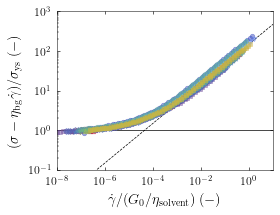

In [139]:
fig, ax, color, marker = create_plot(figsize=(4.2, 3.4))

flow_curves_concentration = flow_curves_concentration.sort_values('w_percent', ascending=False)

x = np.logspace(-8, 1, 30)

ax.plot(x, 150*np.sqrt(x), marker='', ls='--', c='k')
ax.axhline(1, ls='-', c='k', marker='')

for T, dfg in flow_curves_T.groupby('temperature'):
    ax.loglog(dfg.shear_rate / (dfg.elastic_modulus / dfg.solvent_viscosity),
                  (dfg.shear_stress - dfg.viscinf * dfg.shear_rate )/ dfg.yield_stress_TC, c=dict_colors[T], mfc=dict_colors[T], marker=next(marker),
                  alpha=0.5, label=f'{wp}')

for wp, dfg in flow_curves_concentration.groupby('w_percent', sort=False):
    if wp > 1.77:
        c = next(color)
    
        ax.loglog(dfg.shear_rate / (dfg.elastic_modulus / dfg.solvent_viscosity),
                  (dfg.shear_stress - dfg.viscinf * dfg.shear_rate )/ dfg.yield_stress_TC, c=c, mfc=c, marker=next(marker),
                  alpha=0.5, label=f'{wp}')
        

        

ax.set(xlim=[1e-8, 1e1], ylim=[0.1, 1e3], 
       #xticks=[1e-4, 1e-3, 1e-2, 0.1, 1, 10, 100, 1000],
       xlabel='$\dot{\gamma} / (G_\mathrm{0} / \eta_\mathrm{solvent})~(-)$', 
       ylabel='$(\sigma - \eta_\mathrm{bg} \dot{\gamma} ) / \sigma_\mathrm{ys}~(-)$');

fig.savefig('./figures/second_master_curve.svg')
        

[Text(0.5, 0, '$\\dot{\\gamma} / (G / \\eta_\\mathrm{solvent})$'),
 Text(0, 0.5, '$(\\sigma - \\eta_\\infty \\dot{\\gamma} ) / \\sigma_\\mathrm{ys}$')]

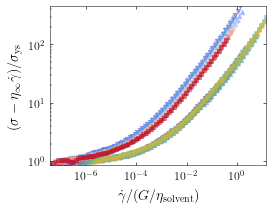

In [120]:
fig, ax, color, marker = create_plot(figsize=(4.2, 3.4))

flow_curves_concentration = flow_curves_concentration.sort_values('w_percent', ascending=False)

for wp, dfg in flow_curves_concentration.groupby('w_percent', sort=False):
    if wp > 1.77:
        c = next(color)
    
        ax.loglog(dfg.shear_rate / (dfg.elastic_modulus / dfg.solvent_viscosity),
                  (dfg.shear_stress - dfg.solvent_viscosity * dfg.shear_rate )/ dfg.yield_stress_TC, c=c, mfc=c, marker=next(marker),
                  alpha=0.5, label=f'{wp}')
        
for T, dfg in flow_curves_T.groupby('temperature'):
    ax.loglog(dfg.shear_rate / (dfg.elastic_modulus / dfg.solvent_viscosity),
                  (dfg.shear_stress - dfg.solvent_viscosity * dfg.shear_rate )/ dfg.yield_stress_TC, c=dict_colors[T], mfc=dict_colors[T], marker=next(marker),
                  alpha=0.5, label=f'{wp}')
        

ax.set(#xlim=[1e-8, 1e1], ylim=[0.1, 1e3], 
       #xticks=[1e-4, 1e-3, 1e-2, 0.1, 1, 10, 100, 1000],
       xlabel='$\dot{\gamma} / (G / \eta_\mathrm{solvent})$', 
       ylabel='$(\sigma - \eta_\infty \dot{\gamma} ) / \sigma_\mathrm{ys}$')